In [43]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math


In [44]:
#download datasets of mist
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#get separated variabloes of traine data (60k) and tests (10k)
datos_entrenamiento,datos_pruebas = datos['train'], datos['test']

In [46]:
#normalize values, passs of 0.255 to 0.1
#(makes the network posible to learn beter and faster)

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255
  return imagenes, etiquetas

#Normalize training data with the function we have made
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#add cache to use memori instead disk, (faster training)
datos_entrenamiento = datos_entrenamiento.cache()
datos_entrenamiento = datos_pruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

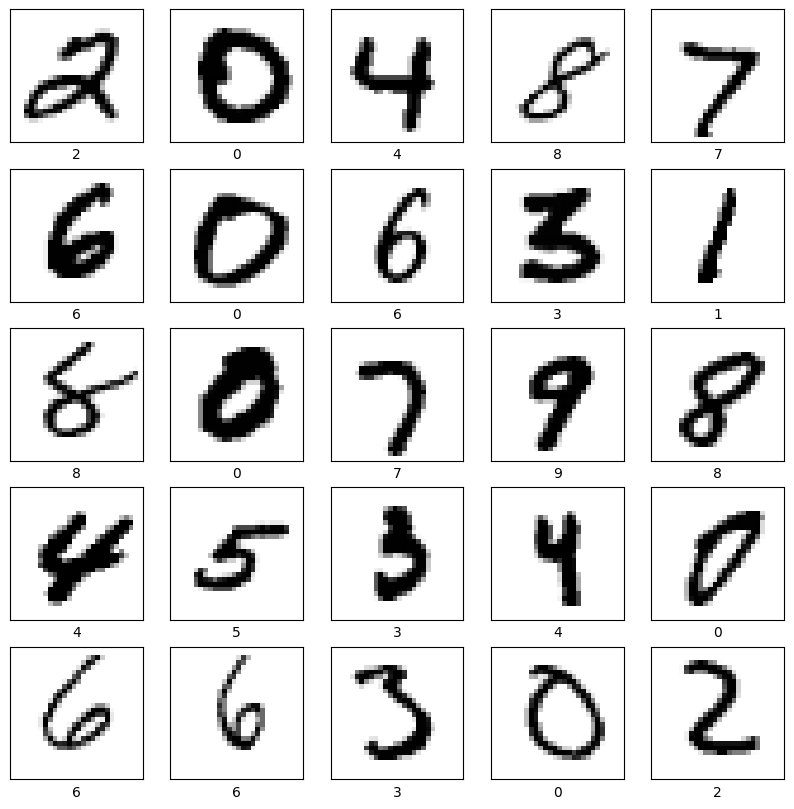

In [47]:
plt.figure(figsize = (10,10))
for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen,cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()

In [48]:
#creation of model (dense model, regular w convulosional networks )

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2x2 is the size of the array

    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2x2 is the size of the array

    tf.keras.layers.Dropout(0.5), #a technique to turn neurons off
    tf.keras.layers.Flatten(), #convert cuadratic image to a simple array
    tf.keras.layers.Dense(units=100, activation='relu'),

    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [49]:
#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [50]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [51]:
historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/60
1875/1875 [==============================] - 60s 31ms/step - loss: 0.9740 - accuracy: 0.6628
Epoch 2/60
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2809 - accuracy: 0.9119
Epoch 3/60
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1981 - accuracy: 0.9368
Epoch 4/60
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1545 - accuracy: 0.9483
Epoch 5/60
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1318 - accuracy: 0.9554
Epoch 6/60
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1184 - accuracy: 0.9593
Epoch 7/60
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1049 - accuracy: 0.9636
Epoch 8/60
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0947 - accuracy: 0.9675
Epoch 9/60
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0858 - accuracy: 0.9706
Epoch 10/60
1875/1875 [==============================] - 55s 29m

In [52]:
!mkdir output_folder


In [53]:
modelo.save("upgraded_writed_numbers.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
!pip install tensorflowjs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 44.3 MB/s eta 0:00:00


In [55]:
!tensorflowjs_converter --input_format keras upgraded_writed_numbers.h5 output_folder

2023-11-06 22:56:24.384893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 22:56:24.384983: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 22:56:24.385074: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 22:56:28.774480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
